## Gradients and Machine Learning
In machine learning, we identify the input and output variables
<br>pertaining to the problem at hand and cast the problem as
<br>generating outputs from input variables. All the inputs are
<br>represented together by the vector $\vec{x}$. Sometimes there
<br>are multiple outputs, sometimes single output. Accordingly,
<br>we have an output vector $\vec{y}$ or output scalar $y$.
<br>Let us denote the function that generates the output from input
<br> vector as $f$, i.e., $y = f\left(\vec{x}\right)$.

In real life problems, we do not know $f$. The crux of machine
<br>learning is to estimate $f$ from a set of observed inputs
<br>$\vec{x}_{i}$ and their corresponding outputs $y_{i}$.
<br>Each observation can be depicted as a pair $\langle\vec{x}_{i}, y_{i}\rangle$.
<br>We model the unknown function $f$ with a known function $\phi$.
<br>$\phi$ is a parameterized function. Alhtough the nature of $\phi$
<br>is known, its parameter values are unknown. These parameter values
<br> are "learnt" via training. This means, we estimate the parameter
<br>values such that the overall error on the observations is minimized.

If $\vec{w}, b$ denotes the current set of parameters (weights, bias), then the model will
<br>output $\phi\left(\vec{x}_{i}, \vec{w}, b\right)$ on the observed input $\vec{x}_{i}$.
<br>Thus the error on this $i^{th}$ observation is $e_{i}^{2}=\left(\phi\left(\vec{x}_{i}, \vec{w}, b\right) - y_{i}\right)^{2}$.
<br>We can batch up several observations and add up the error into a batch error
<br>$L = \sum_{i=0}^{i=N}\left(e^{\left(i\right)}\right)^{2}$.

The error is a function of the parameter set $\vec{w}$.
<br>The question is: how do we adjust $\vec{w}$ so that the error $e_{i}^{2}$ decreases.
<br>We know a function's value changes most when we move along the direction of
<br>of the gradient of the parameters. Hence, we adjust the parameters
<br>$\vec{w}, b$ as
$\begin{bmatrix}
\vec{w}\\b
\end{bmatrix} = \begin{bmatrix}
\vec{w}\\b
\end{bmatrix} - \mu \nabla_{\vec{w}, b}L\left(\vec{w}, b\right)$.
<br>Each adjustment reduces the error. Starting from a random set of parameter values
<br>doing this "sufficiently" large number of times yields the desired model.

A simple and popular model $\phi$ is the linear function (predicted value is
<br>dot product between input and parameters plus bias):
$\tilde{y}_{i} = \phi\left(\vec{x}_{i}, \vec{w}, b\right) = \vec{w}^{T}\vec{x} + b
= \sum_{j}w_{j}x_{j} + b$.
<br>In the example below, this is the model architecture used.

Thus 
\begin{align*}
L &= \sum_{i=0}^{i=N}\left(e^{\left(i\right)}\right)^{2}\\
  &= \sum_{i=0}^{i=N}\left(\vec{w}^{T}\vec{x} + b - y_{i}\right)^{2}\\
\nabla_{\vec{w}, b}L &\propto \sum_{i=0}^{i=N}\left(\vec{w}^{T}\vec{x}_{i} + b - y_{i}\right)\vec{x}_{i} \\
                     &\propto \sum_{i=0}^{i=N}\left(\tilde{y}_{i} - y_{i}\right)\vec{x}_{i}
\end{align*}
Our initial implementation will simply mimic this formula.
<br>For more complicated models $\phi$ (with millions of parameters and non-linearities)
<br>we cannot obtain closed form gradients like this.
<br>The next example, based on PyTorch, relies on PyTorch's
<br>autograd (automatic gradient computation) which does not have this limitation.

In [6]:
import numpy as np
print(np.__version__)
import torch
print(torch.__version__)
import matplotlib.pyplot as plt

1.12.0
1.1.0


In [7]:
# Execute common code (that has been refactored
# out and presented above)
%run common.ipynb

## Gradient Descent via numpy

In [8]:
# Here the input data is generated from a known function
# y_obs = 1.5*x + 2.73.
# Thus our observations (training data) comprise various
# values of x and corresponding values of y computed from
# this function. We will add some noise to the computed
# values to generate the observed value.
#
# We will train a linear model: y_pred = w*x + b 
# and see if the learnt parameters w, b come out close
# to the expected values weight w = 1.5 and bias = 2.73.

np.random.seed(0)
N = 100
# Generate random x values
x = 10 * np.random.randn(N) 
# Compute function outputs
y = 1.5 * x + 2.73

# Add random noise to get the observed value of y
y_obs = y + (0.5 * np.random.randn(N))


# Random initialization of model parameters
w = np.random.randn(1)
b = np.random.randn(1)

# Training: repeatative adjustment of parameters via gradient.
num_steps = 2000
learning_rate = 1e-3
for step in range(num_steps):
    y_pred = w*x + b
    mean_squared_error = np.mean((y_pred - y_obs) ** 2)
    
    # Gradient of error computation using calculus formulas.
    w_grad = np.mean(2 * ((y_pred - y_obs)* x))
    b_grad = np.mean(2 * (y_pred - y_obs))
    w = w - learning_rate * w_grad
    b = b - learning_rate * b_grad
    
    # periodically print diagnostic messages
    if step % 200 == 0:
        print("Step {}: w = {} b = {} \nMSE Error = {}"\
              .format(step, w,  b, mean_squared_error))
        print("Gradient of w: {} \nGradient of b: {}"\
              .format(w_grad, b_grad))

print("True function: y = 1.5*x + 2.73")
print("Learnt function: y_pred = {}*x + {}".format(w[0], b[0]))



Step 0: w = [ 0.01667435] b = [-0.23112257] 
MSE Error = 374.402042616
Gradient of w: -385.856186706 
Gradient of b: -8.25661245391
Step 200: w = [ 1.5176211] b = [ 0.761428] 
MSE Error = 4.29083734718
Gradient of w: 0.0237354280955 
Gradient of b: -4.00606304284
Step 400: w = [ 1.5137106] b = [ 1.42144298] 
MSE Error = 2.07722959442
Gradient of w: 0.015926565641 
Gradient of b: -2.68808406392
Step 600: w = [ 1.51108663] b = [ 1.86431562] 
MSE Error = 1.08056093787
Gradient of w: 0.0106867882094 
Gradient of b: -1.80371498337
Step 800: w = [ 1.50932594] b = [ 2.16148491] 
MSE Error = 0.631814582651
Gradient of w: 0.00717087693649 
Gradient of b: -1.2102998507
Step 1000: w = [ 1.50814451] b = [ 2.36088667] 
MSE Error = 0.42976820545
Gradient of w: 0.0048116866388 
Gradient of b: -0.812115961839
Step 1200: w = [ 1.50735176] b = [ 2.49468604] 
MSE Error = 0.338797575683
Gradient of w: 0.00322866066658 
Gradient of b: -0.544933005728
Step 1400: w = [ 1.50681983] b = [ 2.58446594] 
MSE Erro

## Automatic Gradient Computation in PyTorch
In the numpy code above, we computed the gradient using calculus for this
<br>specific model architecture. This approach does not scale to more complex
<br>models with millions of weights and perhaps non-linear complex functions.
<br>
<br>For scalability, we can use PyTorch, where gradients are computed via
<br>automatic differentiation. The user of the libraries need not worry
<br>about how to compute the gradients - they just construct the model function.
<br>Once the function is specified, PyTorch figures out how to compute its gradient
<br> through a technology called _autograd_.
### Autograd
Autograd is the technology in pytorch for automatic gradient computation.
<br>Here is how it is used.
<br>One explicitly tells pytorch to track gradients with respect to a variable
<br>by setting **requires\_grad = True** when creating the variable. Pytorch
<br>remembers a computation graph which gets updated everytime we create an
<br>expression using tracked variables. Below is an example of computation graph.

In [9]:
from IPython.display import Image, display; 
img = Image(filename='auto_grad.png')
img.width = 600
img.height = 400
display(img)

<br>One calls the **backward()** function on a variable to trigger gradient computation.
<br>It is often called upon the overall error variable $L$.
<br>Then, for every variable, say $w$ on which $L$ depends, pytorch
<br>goes and computes $\frac{\partial L}{\partial w}$ and stores it in the field **w.grad**.
<br>Thus, $\vec{w} = \vec{w} - \nabla_{\vec{w}} L$ happens when one does
<br>for all w: w = w - w.grad

Below, we solve the same problem using PyTorch. 

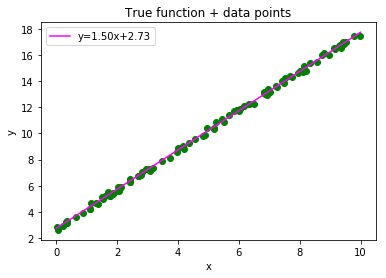

Step 0: w = tensor([0.5210]) b = tensor([0.8223]) 
MSE Error = 52.8511657715
Gradient of w: tensor([-82.0886]) 
Gradient of b: tensor([-13.3374])
Step 100: w = tensor([1.6578]) b = tensor([1.6830]) 
MSE Error = 0.278499215841
Gradient of w: tensor([0.0777]) 
Gradient of b: tensor([-0.5118])
Step 200: w = tensor([1.5970]) b = tensor([2.0834]) 
MSE Error = 0.111292928457
Gradient of w: tensor([0.0462]) 
Gradient of b: tensor([-0.3046])
Step 300: w = tensor([1.5609]) b = tensor([2.3216]) 
MSE Error = 0.0520647279918
Gradient of w: tensor([0.0275]) 
Gradient of b: tensor([-0.1813])
Step 400: w = tensor([1.5393]) b = tensor([2.4634]) 
MSE Error = 0.0310848020017
Gradient of w: tensor([0.0164]) 
Gradient of b: tensor([-0.1079])
Step 500: w = tensor([1.5265]) b = tensor([2.5479]) 
MSE Error = 0.0236530974507
Gradient of w: tensor([0.0097]) 
Gradient of b: tensor([-0.0642])
Step 600: w = tensor([1.5189]) b = tensor([2.5981]) 
MSE Error = 0.0210206527263
Gradient of w: tensor([0.0058]) 
Gradien

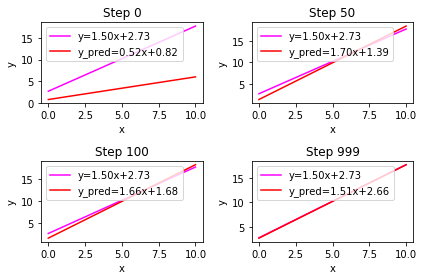

True function: y = 1.5*x + 2.73
Learnt function: y_pred = 1.50910639763*x + 2.66267037392
Model has more or less converged to true underlying function


In [10]:
# We will create the observations (training dataset)
# like before.
torch.manual_seed(0)
N = 100

# Generate random x values
x = 10 * torch.rand(N, 1)

# compute true function output
y = 1.5 * x + 2.73

# Add some random noise to generate observed y values
y_obs = y + (0.5 * torch.rand(N, 1) - 0.25)

# Plot the true function and the data points.
# True y values (magenta) will fall on a straight line.
# The noise-added observed values (green points)
#  will fall around that straight line.
plt.scatter(x.data, y_obs.data, color="green")
draw_line(1.5, 2.73)
plt.title('True function + data points')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='upper left')
plt.show()

# Model this function using y_pred = wx + b
w = torch.rand(1, requires_grad=True)
b = torch.rand(1, requires_grad=True)

params = [b, w]
num_steps = 1000
learning_rate = 1e-2

plt.figure()

# Train model iteratively
i = 1
plot_steps = [0, 50, 100, 999]
for step in range(num_steps):
    # linear model.
    y_pred = params[0] + params[1] * x
    
    # Periodically plot the true function and
    # current approximation to check how we are doing
    if step in plot_steps:
        draw_subplot(i, step, draw_line, 
                            {"m": 1.5, "c": 2.73},
                            draw_line, 
                             {"m": params[1].data.numpy()[0],
                              "c": params[0].data.numpy()[0],
                              "color":"red",
                              "label": "y_pred=%0.2fx+%0.2f"\
                                      %(params[1].data.numpy()[0],
                                        params[0].data.numpy()[0])})
        i+=1

    mean_squared_error = torch.mean((y_pred -
                                     y_obs) ** 2)
    
    # Back propogate. Computes the partial derivative
    # of error with respect to each variable and stores it
    # within the grad field of the variable.
    mean_squared_error.backward()
    
    # Print some diagnostic values every 100th iteration
    if step % 100 == 0:
        print("Step {}: w = {} b = {} \nMSE Error = {}"\
              .format(step, params[1].data, params[0].data
                      , mean_squared_error))
        print("Gradient of w: {} \nGradient of b: {}"\
              .format(params[1].grad, params[0].grad))
        
    # Crucial step, adjust the parameters (weights and bias)
    # using the gradients (partial derivatives) computed during
    # the call to backward() above
    update_parameters(params, learning_rate)

    
plt.tight_layout()
plt.show()

print("True function: y = 1.5*x + 2.73")
print("Learnt function: y_pred = {}*x + {}"\
      .format(params[1].data.numpy()[0],
              params[0].data.numpy()[0]))
print("Model has more or less converged to "
      "true underlying function")   